<a href="https://colab.research.google.com/github/maiphle/Tensorflow/blob/main/TF2_0_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1q71mw_g4Oldak1bah4GcM-gVNeiIAKGz?usp=sharing)

## Loading and analysing Fashion MNIST dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pylab as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


**Confirm type and dimensions of the dataset**

In [2]:
type(train_images)

numpy.ndarray

In [3]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

**How many instances do we have of each of the different classes?**

In [6]:
np.unique(train_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## An overview of the images


In [8]:
# Get 16 images at random
import random
random.seed(1)
train_idx = list(range(len(train_labels)))
sampler = random.sample(train_idx, 16)
sampler

[8805,
 37303,
 55537,
 52577,
 50054,
 4135,
 16716,
 7727,
 32468,
 49870,
 29457,
 30949,
 42702,
 24878,
 51689,
 13759]

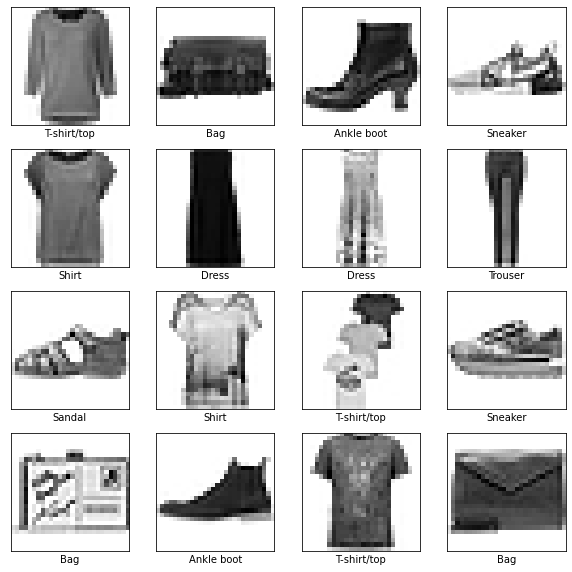

In [9]:
plt.figure(figsize=(10, 10))
for i in range(len(sampler)):
 plt.subplot(4,4,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(train_images[sampler[i]], cmap=plt.cm.binary)
 plt.xlabel(class_names[train_labels[sampler[i]]])
plt.show()


**What does one image look like?**

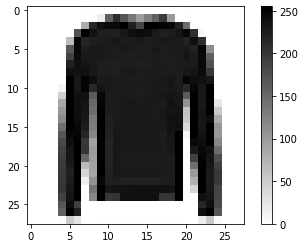

In [11]:
random_image_id = 15000
plt.figure()
plt.imshow(train_images[random_image_id],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
class_names[train_labels[random_image_id]]

'Pullover'

In [13]:
train_images[random_image_id]

array([[  0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  17, 159, 210, 169,
        135,  98, 128, 156, 197, 102,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  84, 215, 239, 244, 247, 255,
        224, 186, 255, 255, 251, 246, 220, 145,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 172, 252, 236, 225, 224, 224, 230,
        240, 244, 242, 229, 224, 225, 233, 248, 205,   7,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  67, 246, 218, 224, 227, 228, 230, 228,
        228, 230, 225, 228, 231, 229, 227, 221, 238, 208,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 168, 246, 225, 229, 229, 228, 227, 230,
        228, 226, 227, 230, 225, 228, 228, 229, 221, 250, 114,   0,   0,
          0,   0],
       [  

## Build, compile and train the model

In [14]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

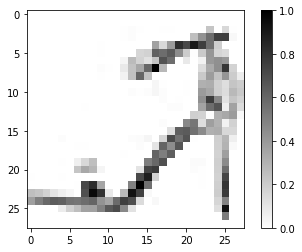

In [15]:
plt.figure()
plt.imshow(train_images[8], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
#build
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),                           
  tf.keras.layers.Dense(128, activation='relu'), 
  tf.keras.layers.Dense(64, activation='relu'),                              
  tf.keras.layers.Dense(10),                             
  ])
#compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 5s 3ms/step - loss: 0.5234 - accuracy: 0.8190 - val_loss: 0.3945 - val_accuracy: 0.8578
Epoch 2/10
844/844 [==============================] - 2s 3ms/step - loss: 0.3804 - accuracy: 0.8624 - val_loss: 0.3604 - val_accuracy: 0.8672
Epoch 3/10
844/844 [==============================] - 3s 3ms/step - loss: 0.3455 - accuracy: 0.8733 - val_loss: 0.3683 - val_accuracy: 0.8683
Epoch 4/10
844/844 [==============================] - 3s 3ms/step - loss: 0.3152 - accuracy: 0.8835 - val_loss: 0.3502 - val_accuracy: 0.8720
Epoch 5/10
844/844 [==============================] - 2s 3ms/step - loss: 0.3015 - accuracy: 0.8883 - val_loss: 0.3389 - val_accuracy: 0.8743
Epoch 6/10
844/844 [==============================] - 3s 3ms/step - loss: 0.2849 - accuracy: 0.8937 - val_loss: 0.3318 - val_accuracy: 0.8817
Epoch 7/10
844/844 [==============================] - 3s 3ms/step - loss: 0.2711 - accuracy: 0.9000 - val_loss: 0.3420 - val_accuracy: 0.8772
Epoch 

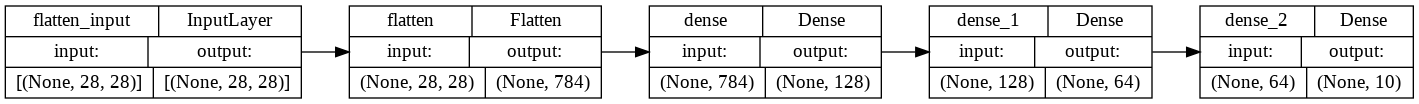

In [17]:
# FashionMNIST
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

## Make predictions


313/313 [==============================] - 0s 1ms/step


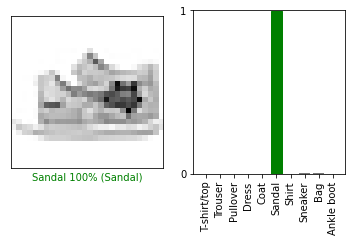

In [22]:
image_id = 9999 # Pick an image id between 0 and 9999 inclusive

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks(range(10))
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(image_id, predictions[image_id], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(image_id, predictions[image_id],  test_labels)
_ = plt.xticks(range(10), class_names, rotation=90)
plt.show()